In [1]:
import pandas as pd
import numpy as np

 Télécharger les données 

In [2]:
#from google.colab import files
#data_to_load = files.upload()

#import io
import pandas as pandas
dt = pandas.read_csv("DimPatientCoded.csv",sep=",",header=0)

In [3]:
dt

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,1,1,India,2,0,1,4,2,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247231,247231,8/6/2020,0,1.0,1,1,0,India,2,2,0,4,1,1,1,0.0
247232,247232,8/6/2020,0,1.0,1,1,0,India,5,2,0,2,1,0,0,5.0
247233,247233,8/6/2020,0,1.0,1,1,0,India,5,0,1,2,2,0,0,2.0
247234,247234,8/6/2020,0,1.0,1,1,0,India,5,0,1,2,2,0,1,0.0


In [4]:
del dt["Date Announced"]
del dt["Unnamed: 0"]
del dt["Nationality"]

In [5]:
print(dt.shape)

(247236, 13)


In [6]:

dt

,Age Bracket,Age,Gender,Current Status,Type of trans,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1.0,0,1,1,1,2,1,4,1,0,1,0.0
1,0,1.0,1,1,1,5,0,0,4,2,1,1,0.0
2,0,1.0,1,1,1,1,2,1,4,1,0,1,0.0
3,0,1.0,1,1,1,2,2,0,2,1,0,0,2.0
4,0,1.0,1,1,1,2,0,1,4,2,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247231,0,1.0,1,1,0,2,2,0,4,1,1,1,0.0
247232,0,1.0,1,1,0,5,2,0,2,1,0,0,5.0
247233,0,1.0,1,1,0,5,0,1,2,2,0,0,2.0
247234,0,1.0,1,1,0,5,0,1,2,2,0,1,0.0


In [7]:
print(dt['Diseases'].unique())

[4 2 0 1 3]


In [8]:
print(dt.groupby('Diseases').size())

Diseases
0    22303
1    24398
2    58709
3    49008
4    92818
dtype: int64


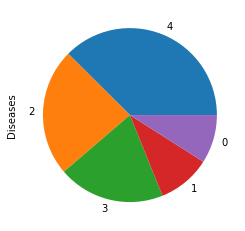

In [9]:
dt['Diseases'].value_counts().plot.pie()
import matplotlib.pyplot as plt
plt.show()

#Diviser les données en données d'apprentissage et données de test 
1) KNN


In [10]:
X= dt.iloc[:,0:8].values
y= pandas.factorize(dt['Diseases'])[0]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Centrage Réduction des données avec la méthode  MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#1) Appliquer k-Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')


In [ ]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# Afficher les paramètres qui donnent les meilleurs performances
best_parameters = clf.best_params_
print(best_parameters)

In [ ]:
#Taux de bonne classification
best_result = clf.best_score_
print(best_result)

In [ ]:
knn = KNeighborsClassifier(17,p=1,leaf_size=1 )
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))